<a href="https://colab.research.google.com/github/MikeRuz551/BigData/blob/main/Data_extracting_PracticeWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url ='https://smart-lab.ru/q/bonds/order_by_val_to_day/desc/page1/'

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
print(response)

<Response [200]>


In [5]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 text/html; charset=utf-8


In [6]:
from bs4 import BeautifulSoup as bso

In [7]:
mysoup = bso(response.text, 'html.parser')

In [8]:
print(mysoup.prettify()[:1000])

<!DOCTYPE html>
<html lang="ru">
 <head>
  <title>
   котировки корпоративных облигаций, Московская биржа
  </title>
  <meta charset="utf-8"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short-Bold.woff" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short-Bold.woff2" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short.woff" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short.woff2" rel="preload"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://smart-lab.ru/q/bonds/" rel="canonical"/>
  <!-- Global Site Tag (gtag.js) - Google Analytics -->
  <script defer="" src="https://www.googletagmanager.com/gtag/js?id=UA-16537214-3">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
		function gtag(){dataLayer.push(arguments);}
		gtag('js',

In [9]:
print(mysoup.title)

<title>котировки корпоративных облигаций, Московская биржа</title>


In [10]:
table_html = mysoup.table.prettify()
print(table_html[:2000])

<table class="_hidden">
 <tbody>
  <tr>
   <th class="trades-table__n">
    №
   </th>
   <th class="trades-table__name trades-table__name--center">
    <a href="/q/bonds/order_by_short_name/asc/">
     Имя
    </a>
   </th>
   <th class="trades-table__chartrow chartrow">
   </th>
   <th>
    <a href="/q/bonds/order_by_mat_years/desc/">
     Лет до
     <br/>
     погаш.
    </a>
   </th>
   <th>
    <a href="/q/bonds/order_by_yield/desc/" title="Доходность облигации к погашению при текущей рыночной цене">
     Доходн
    </a>
   </th>
   <th title="Доходность годового купона относительно номинала">
    <a href="/q/bonds/order_by_year_yield/desc/">
     Год.куп.
     <br/>
     дох.
    </a>
   </th>
   <th title="Доходность купона относительно текущей рыночной цены облигации">
    <a href="/q/bonds/order_by_yield_last/desc/">
     Куп.дох.
     <br/>
     посл.
    </a>
   </th>
   <th>
    <a href="/q/bonds/order_by_sm_rating/desc/">
     Рейтинг
    </a>
   </th>
   <th class="trade

In [11]:
columns = []  # Список для хранения заголовков столбцов
data = []     # Список для хранения данных строк

# Извлекаем заголовки столбцов из тегов <th> в таблице
for th in mysoup.table.find_all('th'):
    columns.append(th.text)  # Добавляем текст из тега <th> в список заголовков

# Извлекаем данные из строк таблицы из тегов <tr> и <td>
for tr in mysoup.table.find_all('tr')[1:]:  # Начинаем с 1, чтобы пропустить первую строку с заголовками
    row = [td.text for td in tr.find_all('td')]  # Создаем список данных для каждой строки таблицы
    data.append(row)  # Добавляем список данных строки в общий список данных

# Создаем DataFrame, используя заголовки столбцов и данные строк
df = pd.DataFrame(data, columns=columns)

# Выводим первые строки DataFrame
df.head()

,№,Имя,,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта,,
0,1,ВЭБP-40,-,8.0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t0.0%\n\t\t\t\t...,\n\t\t\t\t\t\t\t0.0%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t-\t\t\t\t\t\t,-,798.1,0,4,1.4,-,99.70,09.07.24,09.04.24,30.03.32,30.03.32,+,+
1,2,РусГидрБП9,,1.8,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.8%\n\t\t\t\...,\n\t\t\t\t\t\t\t9.2%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t10.0%\n\t\t\t\...,AAA,558.3,45.87,2,18.2,1.67,92.12,31.07.24,01.02.23,28.01.26,-,+,+
2,3,ТМК ЗО2027,,2.8,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t5.8%\n\t\t\t\t...,\n\t\t\t\t\t\t\t4.3%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.5%\n\t\t\t\t...,A+,100.9,21.5,2,668.4,2.69,96.00,12.08.24,10.01.24,12.02.27,-,+,+
3,4,НЛМКЗО26-Д,,2.1,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.8%\n\t\t\t\t...,\n\t\t\t\t\t\t\t5.2%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t5.2%\n\t\t\t\t...,-,97.1,23.5,2,1 606.2,-,99.77,30.05.24,18.12.23,30.05.26,-,+,+
4,5,Магнит2Р04,,0.1,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t16.9%\n\t\t\t\...,\n\t\t\t\t\t\t\t7.0%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t7.1%\n\t\t\t\t...,AAA,94.6,35.15,2,26.1,0.13,98.85,29.05.24,02.06.21,29.05.24,-,+,+


In [12]:
for i in range(1, 19):
    url = f'https://smart-lab.ru/q/bonds/order_by_val_to_day/desc/page{i}/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = bso(response.content, 'html.parser')
        mysoup = bso(response.text, 'html.parser')
        columns = []  # Список для хранения заголовков столбцов
        data = []     # Список для хранения данных строк

        # Извлекаем заголовки столбцов из тегов <th> в таблице
        for th in mysoup.table.find_all('th'):
            columns.append(th.text)  # Добавляем текст из тега <th> в список заголовков

        # Извлекаем данные из строк таблицы из тегов <tr> и <td>
        for tr in mysoup.table.find_all('tr')[1:]:  # Начинаем с 1, чтобы пропустить первую строку с заголовками
            row = [td.text for td in tr.find_all('td')]  # Создаем список данных для каждой строки таблицы
            data.append(row)  # Добавляем список данных строки в общий список данных

        # Создаем DataFrame, используя заголовки столбцов и данные строк
        if i == 1:
            df = pd.DataFrame(data, columns=columns)
        else:
            df = pd.concat([df, pd.DataFrame(data, columns=columns)])

In [13]:
df.head()

,№,Имя,,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта,,
0,1,ВЭБP-40,-,8.0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t0.0%\n\t\t\t\t...,\n\t\t\t\t\t\t\t0.0%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t-\t\t\t\t\t\t,-,798.1,0,4,1.4,-,99.70,09.07.24,09.04.24,30.03.32,30.03.32,+,+
1,2,РусГидрБП9,,1.8,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.8%\n\t\t\t\...,\n\t\t\t\t\t\t\t9.2%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t10.0%\n\t\t\t\...,AAA,558.3,45.87,2,18.2,1.67,92.12,31.07.24,01.02.23,28.01.26,-,+,+
2,3,ТМК ЗО2027,,2.8,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t5.8%\n\t\t\t\t...,\n\t\t\t\t\t\t\t4.3%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.5%\n\t\t\t\t...,A+,100.9,21.5,2,668.4,2.69,96.00,12.08.24,10.01.24,12.02.27,-,+,+
3,4,НЛМКЗО26-Д,,2.1,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.8%\n\t\t\t\t...,\n\t\t\t\t\t\t\t5.2%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t5.2%\n\t\t\t\t...,-,97.1,23.5,2,1 606.2,-,99.77,30.05.24,18.12.23,30.05.26,-,+,+
4,5,Магнит2Р04,,0.1,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t16.9%\n\t\t\t\...,\n\t\t\t\t\t\t\t7.0%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t7.1%\n\t\t\t\t...,AAA,94.6,35.15,2,26.1,0.13,98.85,29.05.24,02.06.21,29.05.24,-,+,+


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1774 entries, 0 to 73
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   №                  1774 non-null   object
 1   Имя                1774 non-null   object
 2                      1774 non-null   object
 3   Лет допогаш.       1774 non-null   object
 4   Доходн             1774 non-null   object
 5   Год.куп.дох.       1774 non-null   object
 6   Куп.дох.посл.      1774 non-null   object
 7   Рейтинг            1774 non-null   object
 8   Объем, млн руб     1774 non-null   object
 9   Купон, руб         1774 non-null   object
 10  Частота,раз в год  1774 non-null   object
 11  НКД, руб           1774 non-null   object
 12  Дюр-я, лет         1774 non-null   object
 13  Цена               1774 non-null   object
 14  Дата купона        1774 non-null   object
 15  Размещение         1774 non-null   object
 16  Погашение          1774 non-null   object
 17  Оф

In [15]:
df.shape

(1774, 20)

In [16]:
df = df.drop(columns = df.columns[-2:])

In [17]:
df.columns

Index(['№', 'Имя', 'Лет допогаш.', 'Доходн', 'Год.куп.дох.', 'Куп.дох.посл.',
       'Рейтинг', 'Объем, млн руб', 'Купон, руб', 'Частота,раз в год',
       'НКД, руб', 'Дюр-я, лет', 'Цена', 'Дата купона', 'Размещение',
       'Погашение', 'Оферта'],
      dtype='object')

In [18]:
import re

def percent_preproc(x):
    return pd.to_numeric(re.search( r"\d+\.\d+", x)[0], errors = 'coerce')

In [19]:
df = df.drop(columns = df.columns[:1])

In [20]:
df['Куп.дох.посл.'] = df['Куп.дох.посл.'].str.replace('-','0.0')
df['Доходн'] = df['Доходн'].str.replace('-','0.0')
df['Год.куп.дох.'] = df['Год.куп.дох.'].str.replace('-','0.0')

In [21]:
df['Лет допогаш.'] = pd.to_numeric(df['Лет допогаш.'], errors = 'coerce')
df['Объем, млн руб'] = pd.to_numeric(df['Объем, млн руб'], errors = 'coerce')
df['Купон, руб'] = pd.to_numeric(df['Купон, руб'], errors = 'coerce')
df['НКД, руб'] = pd.to_numeric(df['НКД, руб'], errors = 'coerce')
df['Дюр-я, лет'] = pd.to_numeric(df['Дюр-я, лет'], errors = 'coerce')
df['Цена'] = pd.to_numeric(df['Цена'], errors = 'coerce')
df['Частота,раз в год'] = pd.to_numeric(df['Частота,раз в год'], errors = 'coerce')
df['Дата купона'] = pd.to_datetime(df['Дата купона'], errors = 'coerce')
df['Размещение'] = pd.to_datetime(df['Размещение'], errors = 'coerce')
df['Погашение'] = pd.to_datetime(df['Погашение'], errors = 'coerce')
df['Доходн'] = df['Доходн'].apply(percent_preproc)
df['Год.куп.дох.'] = df['Год.куп.дох.'].apply(percent_preproc)
df['Куп.дох.посл.'] = df['Куп.дох.посл.'].apply(percent_preproc)

<ipython-input-21-364a551e93b1>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Дата купона'] = pd.to_datetime(df['Дата купона'], errors = 'coerce')
<ipython-input-21-364a551e93b1>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Размещение'] = pd.to_datetime(df['Размещение'], errors = 'coerce')
<ipython-input-21-364a551e93b1>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Погашение'] = pd.to_datetime(df['Погашение'], errors = 'coerce')


In [22]:
df

,Имя,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта
0,ВЭБP-40,8.0,0.0,0.0,0.0,-,798.1,0.00,4.0,1.4,NaN,99.70,2024-09-07,2024-09-04,2032-03-30,30.03.32
1,РусГидрБП9,1.8,14.8,9.2,10.0,AAA,558.3,45.87,2.0,18.2,1.67,92.12,2024-07-31,2023-01-02,2026-01-28,-
2,ТМК ЗО2027,2.8,5.8,4.3,4.5,A+,100.9,21.50,2.0,668.4,2.69,96.00,2024-12-08,2024-10-01,2027-12-02,-
3,НЛМКЗО26-Д,2.1,4.8,5.2,5.2,-,97.1,23.50,2.0,NaN,NaN,99.77,2024-05-30,2023-12-18,2026-05-30,-
4,Магнит2Р04,0.1,16.9,7.0,7.1,AAA,94.6,35.15,2.0,26.1,0.13,98.85,2024-05-29,2021-02-06,2024-05-29,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,BCS12/26-2,2.7,0.0,0.0,0.0,A,NaN,0.00,2.0,NaN,NaN,NaN,2024-01-07,2021-09-21,2026-12-30,-
70,PGIL-28,4.5,0.0,3.2,3.7,-,NaN,16.25,2.0,NaN,NaN,88.00,2024-04-14,2021-10-14,2028-10-14,-
71,BCS11/24-8,0.6,0.0,0.0,0.0,A,NaN,10.03,1.0,NaN,NaN,NaN,2024-11-29,2021-11-29,2024-11-29,-
72,BCS06/25-A,1.1,0.0,0.0,0.0,A,NaN,0.00,1.0,NaN,NaN,NaN,2024-01-12,2021-01-12,2025-01-06,-


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1774 entries, 0 to 73
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Имя                1774 non-null   object        
 1   Лет допогаш.       1774 non-null   float64       
 2   Доходн             1774 non-null   float64       
 3   Год.куп.дох.       1774 non-null   float64       
 4   Куп.дох.посл.      1774 non-null   float64       
 5   Рейтинг            1774 non-null   object        
 6   Объем, млн руб     1088 non-null   float64       
 7   Купон, руб         1774 non-null   float64       
 8   Частота,раз в год  1774 non-null   float64       
 9   НКД, руб           1300 non-null   float64       
 10  Дюр-я, лет         1030 non-null   float64       
 11  Цена               1454 non-null   float64       
 12  Дата купона        1770 non-null   datetime64[ns]
 13  Размещение         1774 non-null   datetime64[ns]
 14  Погашение      

In [25]:
df.rename(
    columns = {
        "Доходн": "Доходность, %",
        "Год.куп.дох.": "Год.куп.дох., %",
        "Куп.дох.посл.": "Куп.дох.посл., %",
        "Цена": "Цена, руб."
    },
    inplace = True
)

In [26]:
df.head()

,Имя,Лет допогаш.,"Доходность, %","Год.куп.дох., %","Куп.дох.посл., %",Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет","Цена, руб.",Дата купона,Размещение,Погашение,Оферта
0,ВЭБP-40,8.0,0.0,0.0,0.0,-,798.1,0.00,4.0,1.4,NaN,99.70,2024-09-07,2024-09-04,2032-03-30,30.03.32
1,РусГидрБП9,1.8,14.8,9.2,10.0,AAA,558.3,45.87,2.0,18.2,1.67,92.12,2024-07-31,2023-01-02,2026-01-28,-
2,ТМК ЗО2027,2.8,5.8,4.3,4.5,A+,100.9,21.50,2.0,668.4,2.69,96.00,2024-12-08,2024-10-01,2027-12-02,-
3,НЛМКЗО26-Д,2.1,4.8,5.2,5.2,-,97.1,23.50,2.0,NaN,NaN,99.77,2024-05-30,2023-12-18,2026-05-30,-
4,Магнит2Р04,0.1,16.9,7.0,7.1,AAA,94.6,35.15,2.0,26.1,0.13,98.85,2024-05-29,2021-02-06,2024-05-29,-


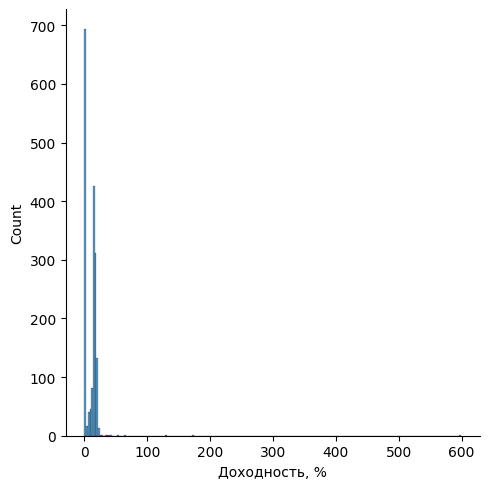

In [27]:
sns.displot(df['Доходность, %'])

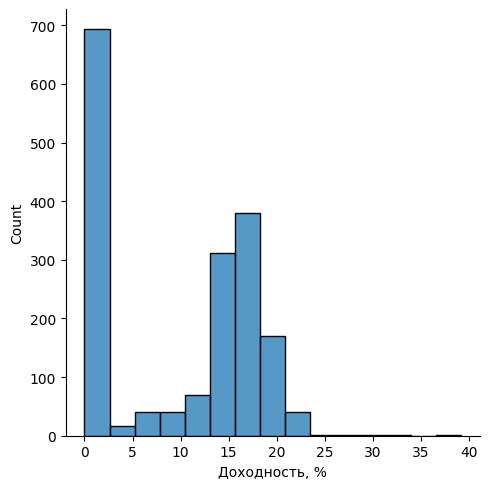

In [28]:
sns.displot(df[df['Доходность, %'] <= 40]['Доходность, %'])

In [29]:
print("Топ 5 облигаций с самой высокой доходностью")
df.sort_values(by = "Доходность, %", ascending = False).head(5)

Топ 5 облигаций с самой высокой доходностью


,Имя,Лет допогаш.,"Доходность, %","Год.куп.дох., %","Куп.дох.посл., %",Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет","Цена, руб.",Дата купона,Размещение,Погашение,Оферта
45,Титан-3 01,29.4,599.4,7.4,8.1,B+,0.1,3.37,4.0,2.8,0.04,92.00,2024-04-28,2021-03-03,2053-07-28,-
82,РуСол клА,6.9,173.7,12.8,13.8,BBB+,NaN,21.16,4.0,13.4,0.09,92.18,2024-05-15,2020-12-02,2031-02-15,-
67,РуСол клБ,6.9,130.3,16.8,17.8,BBB+,0.0,29.79,4.0,18.9,0.09,93.95,2024-05-15,2020-12-02,2031-02-15,-
9,ГПБ-КИ-08,1.0,63.2,0.0,0.0,AA+,NaN,0.20,0.5,0.1,NaN,60.22,2025-04-25,2023-04-26,2025-04-25,25.04.25
10,Титан-5 А,26.3,52.9,10.7,11.4,B+,0.4,17.78,4.0,3.3,0.21,93.61,2024-06-26,2023-02-16,2050-06-26,-


In [30]:
df1 = df.pivot_table(index='Рейтинг', values='Имя', aggfunc='count').sort_values(by='Имя', ascending=False)

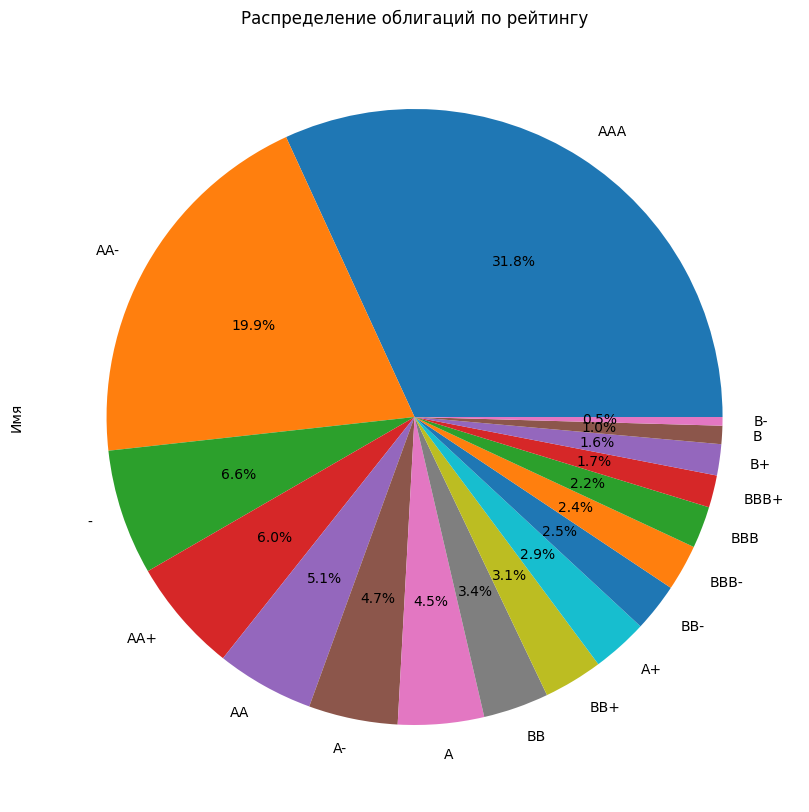

In [31]:
plt.rcParams["figure.figsize"] = [20, 10]
df1.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.title('Распределение облигаций по рейтингу')
plt.show()